# Overfitting and Regularization in Neural Networks



**Overfitting** occurs when a model learns the noise and fluctuations in the training data instead of the general pattern. This leads to excellent training performance but poor generalization to unseen data.

### Symptoms of Overfitting:
- **Low training loss but high validation loss**
- **High training accuracy but low validation accuracy**

---

To reduce overfitting, we apply **regularization techniques**, such as:

- **Dropout**
- **L1 Regularization (Lasso)**
- **L2 Regularization (Ridge)**

These techniques constrain the model’s learning to improve generalization.


## Dropout Regularization

**Dropout** is a stochastic regularization technique. It randomly "drops" neurons (i.e., sets their output to zero) during training with a certain probability `p`.

This forces the network to not rely on specific neurons and promotes independent feature learning.

### Mathematical Explanation:

If a layer has output:

  **y = f(Wx + b)**

Then with dropout mask `m`, where each element of `m` is 0 with probability `p` and 1 with probability `1 - p`, the output becomes:

  **y_dropout = f(W(x * m) + b)**

Here:
- `*` denotes element-wise multiplication
- `m ∼ Bernoulli(1 - p)`


## L1 and L2 Regularization

Regularization techniques are designed to **reduce overfitting** by discouraging the model from becoming overly complex (e.g., by assigning large weights). They do this by **adding a penalty term to the loss function** during training.

---

## Why Do We Need Regularization?

In deep learning, a model with many parameters (weights) can fit almost any data — even noise. This flexibility can lead to **overfitting**, where the model performs well on training data but poorly on unseen data.

To combat this, **regularization** imposes a constraint on weight magnitudes, encouraging the model to find **simpler, more generalizable functions**.

---

## L1 Regularization (Lasso)

L1 regularization adds the **sum of the absolute values of the weights** to the loss function:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{data}} + \lambda \sum_{i=1}^{n} |w_i|
$$

- $\mathcal{L}_{\text{data}}$ = original loss (e.g., cross-entropy or MSE)  
- $\lambda$ = regularization strength (hyperparameter)  
- $w_i$ = each trainable weight  

### Effect:
- Drives some weights to **exactly zero**  
- Promotes **sparse** models (only few active neurons/features)  
- Useful when **feature selection** is important

---

## L2 Regularization (Ridge)

L2 regularization adds the **sum of the squared values of the weights** to the loss function:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{data}} + \lambda \sum_{i=1}^{n} w_i^2
$$

### Effect:
- Penalizes large weights more heavily  
- Does **not** force weights to zero  
- Encourages **smoothness** and **weight decay**  
- Helps prevent overfitting by smoothing the model complexity

---

## Background and Intuition

- These techniques originated from **Bayesian statistics**, where regularization can be seen as imposing a prior distribution on weights:
  - **L1** regularization corresponds to a **Laplace prior** (sharp peak at 0)
  - **L2** regularization corresponds to a **Gaussian prior** (centered at 0)

- Regularization serves as a form of **capacity control**, limiting the model's ability to memorize the training data.

---

## Implementation in Keras:

Use the `kernel_regularizer` argument in Dense layers:

```python
from tensorflow.keras import regularizers

# L1 Regularization
Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001))

# L2 Regularization
Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))

# L1 + L2 Regularization (ElasticNet)
Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))


## Summary: Overfitting & Regularization

| Regularization Type | Description | Key Effect |
|---------------------|-------------|------------|
| **Dropout** | Randomly disables neurons | Prevents co-adaptation |
| **L1** | Adds absolute weights to loss | Promotes sparsity |
| **L2** | Adds squared weights to loss | Prevents large weights |

---

**Key Takeaway:**  
Overfitting is common in deep learning. Techniques like dropout and regularization help in generalizing better to unseen data.

For complex datasets like **Covertype**, combining **dropout** with **L2** often yields best results.

# ANN on MNIST Image Classification with L1/L2 Regularization



Now we demonstrate the use of Artificial Neural Networks (ANN) on the MNIST dataset, while applying **L1**, **L2**, and **L1_L2** regularization to combat overfitting and improve generalization.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Input shape
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


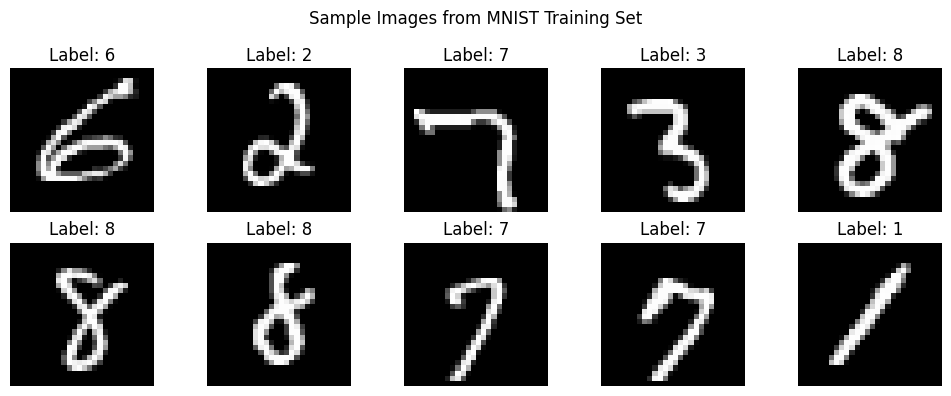

In [ ]:
import matplotlib.pyplot as plt

# Plot 10 random images from training set
plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Training Set")
plt.tight_layout()
plt.show()

In [ ]:
def build_model(reg_type=None):
    if reg_type == 'l1':
        regularizer = regularizers.l1(0.001)
    elif reg_type == 'l2':
        regularizer = regularizers.l2(0.001)
    elif reg_type == 'l1_l2':
        regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)
    else:
        regularizer = None

    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Select regularization type: 'l1', 'l2', 'l1_l2', or None
reg_type = 'l2'

model = build_model(reg_type=reg_type)

# Use early stopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy with {reg_type.upper()} Regularization: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8066 - loss: 0.9241 - val_accuracy: 0.9380 - val_loss: 0.3790
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9492 - loss: 0.3428 - val_accuracy: 0.9570 - val_loss: 0.2967
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9590 - loss: 0.2823 - val_accuracy: 0.9640 - val_loss: 0.2561
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.2402 - val_accuracy: 0.9664 - val_loss: 0.2304
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.2193 - val_accuracy: 0.9708 - val_loss: 0.2151
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.1980 - val_accuracy: 0.9723 - val_loss: 0.2018
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.1842 - val_accuracy: 0.9693 - val_loss: 0.2063
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.1793 - val_accuracy: 0.

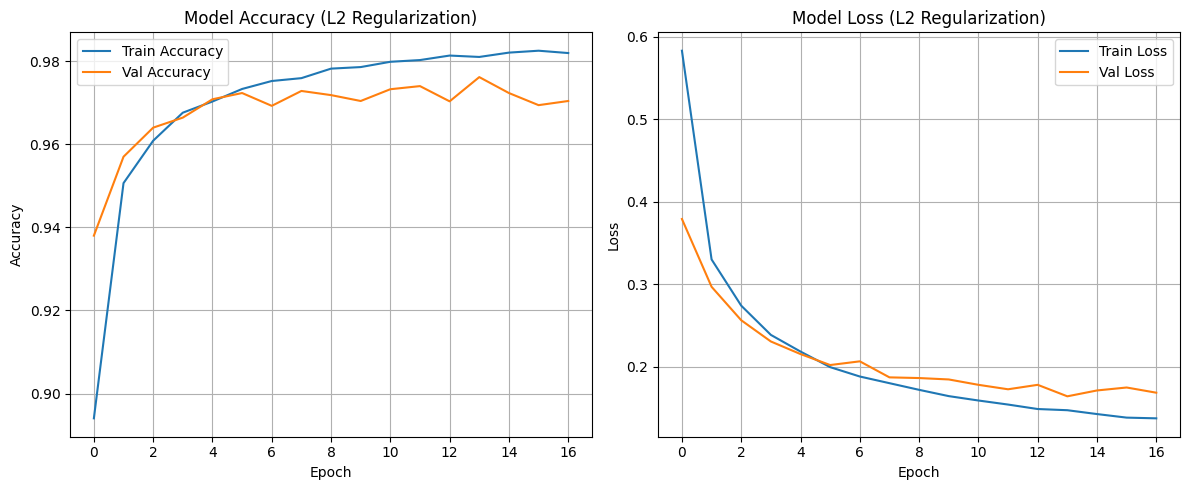

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title(f"Model Accuracy ({reg_type.upper()} Regularization)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Model Loss ({reg_type.upper()} Regularization)")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


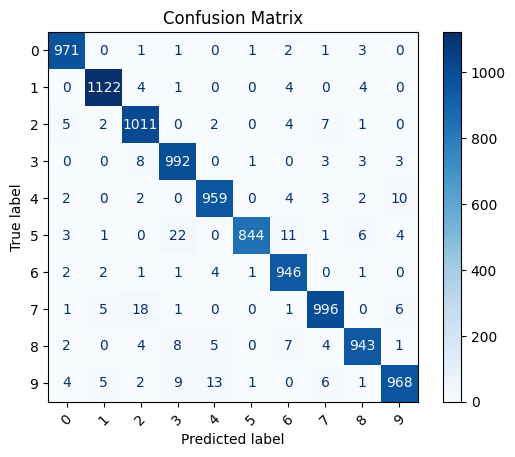

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.9808    0.9908    0.9858       980
           1     0.9868    0.9885    0.9877      1135
           2     0.9619    0.9797    0.9707      1032
           3     0.9585    0.9822    0.9702      1010
           4     0.9756    0.9766    0.9761       982
           5     0.9953    0.9462    0.9701       892
           6     0.9663    0.9875    0.9768       958
           7     0.9755    0.9689    0.9722      1028
           8     0.9782    0.9682    0.9732       974
           9     0.9758    0.9594    0.9675      1009

    accuracy                         0.9752     10000
   macro avg     0.9755    0.9748    0.9750     10000
weighted avg     0.9754    0.9752    0.9752     10000



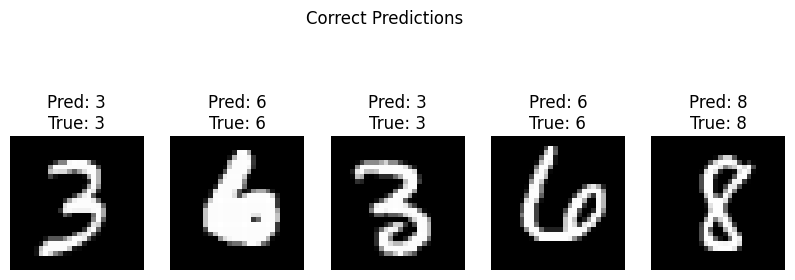

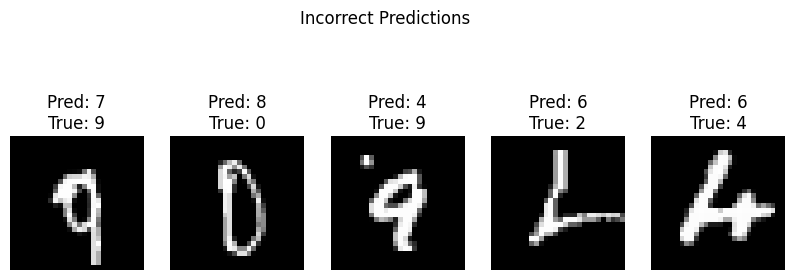

In [ ]:
# Find correctly and incorrectly predicted indices
correct_idx = np.where(y_pred == y_true)[0]
incorrect_idx = np.where(y_pred != y_true)[0]

# Plot correct predictions
plt.figure(figsize=(10, 4))
for i, idx in enumerate(np.random.choice(correct_idx, 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_true[idx]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()

# Plot incorrect predictions
plt.figure(figsize=(10, 4))
for i, idx in enumerate(np.random.choice(incorrect_idx, 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_true[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {100*test_acc:.2f}%")

Final Test Accuracy: 97.52%


# Evaluation Notes

- L1 Regularization pushes weights toward zero, potentially leading to sparse connections.
- L2 Regularization penalizes large weights more heavily, producing smoother models.
- L1_L2 (ElasticNet) combines benefits of both.
- Regularization typically results in slightly lower training accuracy but **better generalization** (higher test accuracy).

You can experiment by changing `reg_type` in the training cell above to `'l1'`, `'l2'`, `'l1_l2'`, or `None`.